# Telecom Churn Case Study

### Problem Statement
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
- In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Approach
1. Data Understanding & Cleaning
2. EDA
3. Derived Metrics
4. Dimensionality Reduction using PCA
5. Classification models to predict Churn (Use various Models & Handle class imbalance)
6. Model Evaluation
7. Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)
8. Summarize

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#to view large outputs
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data understanding and Cleaning

### Reading and Understanding the Data

In [2]:
# Importing dataset
df = pd.read_csv(r"C:\Users\Bharath\Downloads\telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Check the shape of data frame
df.shape

(99999, 226)

In [4]:
# printing the information of variables to check their data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# Printing descriptive  statistics of numeric columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


### Observations: 
- Dataset has 99999 rows and 226 columns.
- There are a few rows with missing values, that needs attention.

In [6]:
# Importing the data dictionary.
data_dict = pd.read_excel(r"C:\Users\Bharath\Downloads\Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### 1.2 Cleaning the data

In [7]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [8]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in df.columns:
    if df[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass
unique_1_col

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [9]:
# Dropping colums with only one unique value
df.drop(unique_1_col, axis=1, inplace = True)
df.shape

(99999, 210)

In [10]:
# selecting all the columns with datetime format
date_col= df.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    df[i] = pd.to_datetime(df[i])
df.info(verbose=True)


These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   arpu_6                    float64       
 2   arpu_7                    float64       
 3   arpu_8                    float64       
 4   arpu_9                    float64       
 5   onnet_mou_6               float64       
 6   onnet_mou_7               float64       
 7   onnet_mou_8               float64       
 8   onnet_mou_9               float64       
 9   offnet_mou_6              float64       
 10  offnet_mou_7              fl

In [11]:
# checking count_rech_2g_*,count_rech_3g_* for month 6,7,8 and 9
df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,0.0,1.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


### Observations: 
- It can be concluded from the above table that 'total_rech_data_6' is enough information having 'count_rech_2g_6','count_rech_3g_6' is redundant so we can drop ['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9'] these columns

In [12]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
df.drop(['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8',
         'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [13]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
night_pck_user_6            74.85
arpu_2g_6                   74.85
fb_user_6                   74.85
total_rech_data_6           74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
arpu_3g_7                   74.43
av_rech_amt_data_7          74.43
fb_user_7                   74.43
total_rech_data_7           74.43
max_rech_data_7             74.43
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
total_rech_data_9           74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
max_rech_data_9             74.08
fb_user_9                   74.08
date_of_last_rech_data_8    73.66
av_rech_amt_data_8          73.66
night_pck_user_8            73.66
max_rech_data_8             73.66
arpu_2g_8                   73.66
total_rech_dat

In [14]:
# missing values above 50% and does not seem to add any information to understand the data
df.drop(['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8',
         'arpu_3g_9','arpu_2g_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9',
         'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],axis=1, inplace=True)

In [15]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

av_rech_amt_data_6          74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_9          74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
max_rech_data_8             73.66
total_rech_data_8           73.66
av_rech_amt_data_8          73.66
date_of_last_rech_data_8    73.66
std_ic_t2m_mou_9             7.75
loc_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2t_mou_9             7.75
loc_og_t2f_mou_9             7.75
spl_ic_mou_9                 7.75
isd_ic_mou_9                 7.75
loc_og_t2c_mou_9             7.75
ic_others_9                  7.75
loc_og_mou_9                 7.75
std_ic_t2t_mou_9             7.75
std_og_t2f_mou_9             7.75
loc_ic_t2m_mou

In [16]:
df.shape

(99999, 186)

In [17]:
# Fetching all recharge columns
col_rech=[]
for col in list(df.columns):
    if ('rech' in col):
        col_rech.append(col)

# Imputing zeroes for all recharge columns
df[col_rech]=df[col_rech].replace(np.NaN,0.0)

print(col_rech)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [18]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

std_ic_t2t_mou_9            7.75
loc_og_t2t_mou_9            7.75
loc_og_t2f_mou_9            7.75
loc_og_t2c_mou_9            7.75
loc_og_mou_9                7.75
std_og_t2t_mou_9            7.75
std_og_t2m_mou_9            7.75
std_og_t2f_mou_9            7.75
isd_og_mou_9                7.75
ic_others_9                 7.75
isd_ic_mou_9                7.75
spl_ic_mou_9                7.75
spl_og_mou_9                7.75
std_ic_mou_9                7.75
std_ic_t2f_mou_9            7.75
std_ic_t2m_mou_9            7.75
og_others_9                 7.75
loc_ic_mou_9                7.75
loc_ic_t2f_mou_9            7.75
loc_ic_t2m_mou_9            7.75
loc_ic_t2t_mou_9            7.75
loc_og_t2m_mou_9            7.75
std_og_mou_9                7.75
roam_ic_mou_9               7.75
onnet_mou_9                 7.75
offnet_mou_9                7.75
roam_og_mou_9               7.75
spl_ic_mou_8                5.38
std_og_t2m_mou_8            5.38
roam_ic_mou_8               5.38
std_ic_t2t

In [19]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,1.403309e+18,1.405469e+18,1.407456e+18,1.411862e+18,252,252,252,0,1.403309e+18,1.405469e+18,1.407456e+18,0.000000e+00,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0

In [20]:
churn_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,99999.000000,99999.000000,99999.000000,99999.000000
mean,189.214260,289.279198,44.719701,136.056613
std,284.823024,468.980002,198.653570,577.394194
min,0.000000,0.000000,0.000000,0.000000
25%,32.370000,25.510000,0.000000,0.000000
50%,105.890000,125.460000,0.000000,0.000000
75%,236.320000,353.480000,0.000000,0.000000
max,10796.590000,11517.730000,8993.950000,39221.270000


In [21]:
df['total_calls_mou_9'] = df['total_ic_mou_9'] + df['total_og_mou_9']
df['total_internet_mb_9'] =  df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['churn'] = df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [22]:
# Churn Percentage on full data

(df.loc[(df.churn==1),:].shape[0])/df.shape[0]*100

10.19110191101911

### As we can see that 91% of the customers do not churn, there is a possibility of class imbalance

### Filtering High Value Customers

In [23]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
df['total_rech_amt_data_6']=df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7']=df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
df = df[df['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [24]:
df.shape

(30001, 194)

In [25]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_calls_mou_9,total_internet_mb_9,churn,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,1.403309e+18,1.405469e+18,1.407456e+18,1.411862e+18,252,252,252,0,1.403309e+18,1.405469e+18,1.407456e+18,0.000000e+00,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,0.00,0.00,1,252.0,252.0,614.0,504.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,1

In [26]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

std_ic_t2m_mou_9            6.34
roam_ic_mou_9               6.34
std_ic_mou_9                6.34
loc_og_mou_9                6.34
loc_og_t2f_mou_9            6.34
spl_og_mou_9                6.34
std_ic_t2f_mou_9            6.34
loc_og_t2m_mou_9            6.34
std_og_t2t_mou_9            6.34
spl_ic_mou_9                6.34
loc_og_t2t_mou_9            6.34
loc_ic_t2t_mou_9            6.34
std_og_t2m_mou_9            6.34
roam_og_mou_9               6.34
std_ic_t2t_mou_9            6.34
isd_ic_mou_9                6.34
ic_others_9                 6.34
std_og_mou_9                6.34
loc_ic_t2m_mou_9            6.34
isd_og_mou_9                6.34
loc_ic_t2f_mou_9            6.34
og_others_9                 6.34
std_og_t2f_mou_9            6.34
onnet_mou_9                 6.34
loc_og_t2c_mou_9            6.34
loc_ic_mou_9                6.34
offnet_mou_9                6.34
std_og_t2m_mou_8            3.91
std_og_mou_8                3.91
std_og_t2t_mou_8            3.91
isd_ic_mou

- The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer.

In [27]:
# Numerical columns available
num_col = df.select_dtypes(include = ['int64','float64']).columns.tolist()

In [28]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
df[num_col]=scalar.fit_transform(df[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
df_final = pd.DataFrame(knn.fit_transform(df[num_col]))
df_final.columns=df[num_col].columns

In [29]:
# check for any null values after imputation for numerical columns
df_final.isnull().sum().sum()

0

In [30]:
# Converting the scaled data back to the original data
df_final[num_col]=scalar.inverse_transform(df_final)

# Checking the top 10 data
df_final.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_calls_mou_9,total_internet_mb_9,churn,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,36.493333,27.66,0.00,29.766667,132.69,73.346667,0.00,42.666667,0.00,0.00,0.00,75.360000,0.00,0.00,0.00,72.933333,15.553333,9.21,0.00,0.00,15.063333,21.13,0.00,0.00,22.97,11.176667,0.00,0.00,3.116667,6.686667,0.00,0.016667,53.593333,41.52,0.00,0.00,20.936667,8.353333,0.00,0.00,26.343333,27.42,0.00,0.00,0.00,11.053333,0.00,0.00,47.28,46.83,0.00,0.00,0.766667,0.00,0.00,0.00,67.54,12.653333,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,10.796667,42.88,0.16,0.00,83.213333,25.603333,4.13,0.00,0.966667,0.713333,1.15,0.00,94.983333,69.20,5.44,0.00,29.236667,32.87,0.00,0.00,8.213333,31.376667,0.00,0.00,7.993333,4.86,0.00,0.00,45.446667,69.11,0.00,0.00,0.00,0.00,5.44,0.00,0.06,0.0,0.0,0.00,2.48,1.71,0.00,0.00,0.00,0.993333,0.00,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.403309e+18,1.405469e+18,1.407456e+18,1.411862e+18,252.0,252.0,252.0,0.0,1.403309e+18,1.405469e+18,1.407456e+18,0.000000e+00,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.

In [31]:
# Checking the percentage of missing values
round(100*(df_final.isnull().sum()/len(df_final.index)), 2).sort_values(ascending=False)

avg_rech_amt_6_7            0.0
std_og_t2m_mou_9            0.0
total_og_mou_7              0.0
total_og_mou_6              0.0
og_others_9                 0.0
og_others_8                 0.0
og_others_7                 0.0
og_others_6                 0.0
spl_og_mou_9                0.0
spl_og_mou_8                0.0
spl_og_mou_7                0.0
spl_og_mou_6                0.0
isd_og_mou_9                0.0
isd_og_mou_8                0.0
isd_og_mou_7                0.0
isd_og_mou_6                0.0
std_og_mou_9                0.0
std_og_mou_8                0.0
std_og_mou_7                0.0
std_og_mou_6                0.0
std_og_t2f_mou_9            0.0
std_og_t2f_mou_8            0.0
std_og_t2f_mou_7            0.0
total_og_mou_8              0.0
total_og_mou_9              0.0
loc_ic_t2t_mou_6            0.0
loc_ic_mou_6                0.0
std_ic_t2m_mou_7            0.0
std_ic_t2m_mou_6            0.0
std_ic_t2t_mou_9            0.0
std_ic_t2t_mou_8            0.0
std_ic_t

- The data frame is free from Null values

### Deleting data for 9th month

In [32]:
col_9=[]
for col in list(df_final.columns):
    if ('_9' in col):
        col_9.append(col)
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'total_calls_mou_9', 'total_internet_mb_9']


In [33]:
df_final=df_final.drop(col_9,axis=1)

In [34]:
col_date=[]
for col in list(df_final.columns):
    if ('date_' in col):
        col_date.append(col)
print(col_date)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [35]:
df_final=df_final.drop(col_date,axis=1)

In [36]:
df_final.shape

(30001, 141)

## Data Analysis

0.0    91.863605
1.0     8.136395
Name: churn, dtype: float64


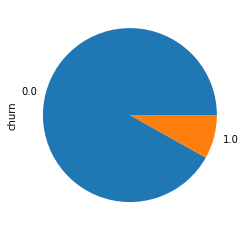

In [37]:
# Visualise the target variable distribution
print((df_final['churn'].value_counts()/len(df_final))*100)
((df_final['churn'].value_counts()/len(df_final))*100).plot(kind="pie")
plt.show()

- There is a class imbalance

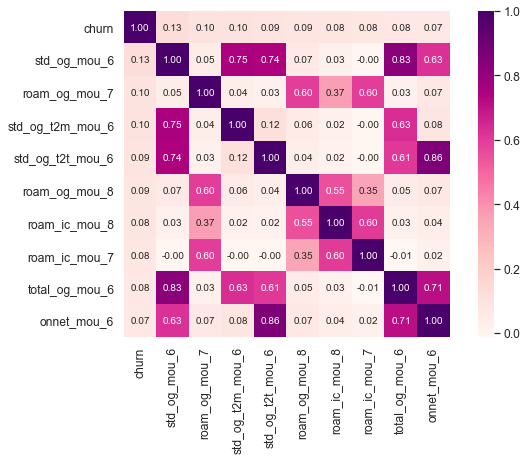

In [56]:
# Features correlated to target variable
corrmatrix = df_final.corr()
plt.figure(figsize = (10,6))
columnss = corrmatrix.nlargest(10, 'churn')["churn"].index
cm = np.corrcoef(df_final[columnss].values.T)
sns.set(font_scale = 1.1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                 yticklabels = columnss.values, xticklabels = columnss.values)


- These are the top 10 features correlated to the target variable

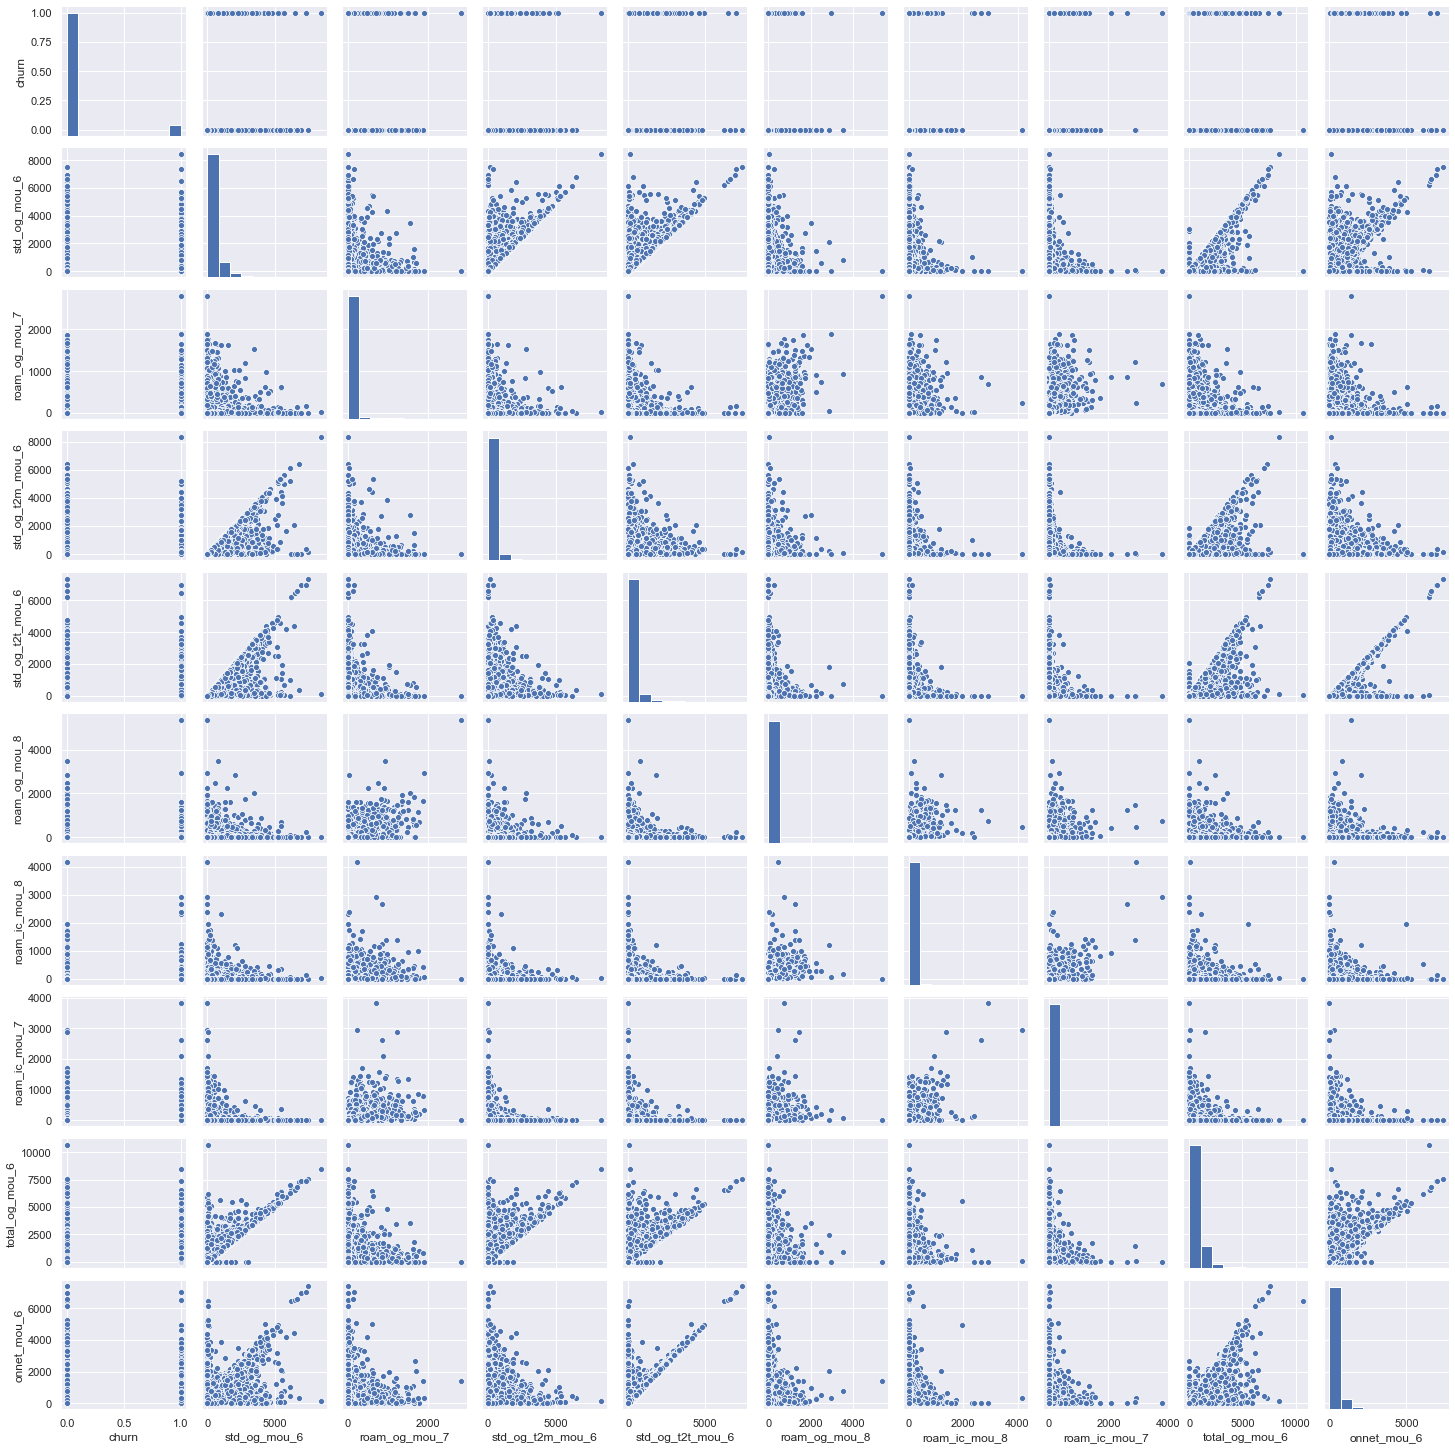

In [58]:
# Check the top 10 features values using pairplots
sns.set()
sns.pairplot(df_final[columnss],height = 2)
plt.show()

In [57]:
# Checking correlation among features
df_final_corr = df_final.corr()
df_final_corr.loc[:,:] = np.tril(df_final_corr, k=-1)
df_final_corr = df_final_corr.stack()
df_final_corr
df_final_corr[(df_final_corr > 0.80) | (df_final_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                   0.955351
total_rech_amt_6    arpu_6                   0.946125
total_rech_amt_7    arpu_7                   0.943588
isd_og_mou_8        isd_og_mou_7             0.943309
overall_rech_amt_7  total_rech_amt_data_7    0.934656
overall_rech_amt_6  total_rech_amt_data_6    0.934058
isd_og_mou_8        isd_og_mou_6             0.918324
isd_og_mou_7        isd_og_mou_6             0.915427
sachet_2g_7         total_rech_data_7        0.904243
sachet_2g_6         total_rech_data_6        0.903875
sachet_2g_8         total_rech_data_8        0.900629
total_ic_mou_6      loc_ic_mou_6             0.894621
total_ic_mou_8      loc_ic_mou_8             0.894220
total_ic_mou_7      loc_ic_mou_7             0.882957
std_og_t2t_mou_8    onnet_mou_8              0.860522
std_og_t2t_mou_7    onnet_mou_7              0.860191
std_og_t2t_mou_6    onnet_mou_6              0.859443
avg_rech_amt_6_7    overall_rech_amt_7       0.856275
std_og_t2m_mou_7    offnet_m

- There a lot of features which are correlated to each other we should use dimensionality reduction techniques such as PCA

## Data Preparation

In [59]:
df_final_2 = df_final

In [60]:
df_final_2.drop(['mobile_number'], axis=1, inplace=True)

In [62]:
df_final_2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,197.385,214.816,213.803,36.493333,27.66,0.00,132.69,73.346667,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.553333,9.21,0.00,15.063333,21.13,0.00,22.97,11.176667,0.00,3.116667,6.686667,0.00,53.593333,41.52,0.00,20.936667,8.353333,0.00,26.343333,27.42,0.00,0.00,11.053333,0.00,47.28,46.83,0.00,0.766667,0.00,0.00,67.54,12.653333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,10.796667,42.88,0.16,83.213333,25.603333,4.13,0.966667,0.713333,1.15,94.983333,69.20,5.44,29.236667,32.87,0.00,8.213333,31.376667,0.00,7.993333,4.86,0.00,45.446667,69.11,0.00,0.00,0.00,5.44,0.06,0.0,0.0,2.48,1.71,0.00,0.00,0.993333,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,1.0,252.0,252.0,614.0,504.0,559.0
1,1069.180,1349.850,3171.480,57.840000,54.68,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.390000,31.38,40.28,308.630000,447.38,162.28,62.13,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.91,255.79,4.300000,23.290000,12.01,49.890000,31.76,49.14,6.66,20.080000,16.68,60.86,75.14,77.84,0.000000,0.18,10.01,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.26,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23,188.04,36.890000,11.83,30.39,91.440000,126.990000,141.33,52.190000,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,1.0,0.0,0.0,1580.0,790.0,1185.0
2,378.721,492.223,137.362,413.690000,351.03,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.130000,217.59,12.49,80.960000,70.58,50.54,0.00,0.000000,0.00,0.000000,0.000000,7.15

In [67]:
# lets create X dataset for model building.
X = df_final_2.drop(['churn'],axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,197.385,214.816,213.803,36.493333,27.66,0.00,132.69,73.346667,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.553333,9.21,0.00,15.063333,21.13,0.00,22.97,11.176667,0.00,3.116667,6.686667,0.00,53.593333,41.52,0.00,20.936667,8.353333,0.00,26.343333,27.42,0.00,0.00,11.053333,0.00,47.28,46.83,0.00,0.766667,0.00,0.00,67.54,12.653333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,10.796667,42.88,0.16,83.213333,25.603333,4.13,0.966667,0.713333,1.15,94.983333,69.20,5.44,29.236667,32.87,0.00,8.213333,31.376667,0.00,7.993333,4.86,0.00,45.446667,69.11,0.00,0.00,0.00,5.44,0.06,0.0,0.0,2.48,1.71,0.00,0.00,0.993333,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,1069.180,1349.850,3171.480,57.840000,54.68,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.390000,31.38,40.28,308.630000,447.38,162.28,62.13,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.91,255.79,4.300000,23.290000,12.01,49.890000,31.76,49.14,6.66,20.080000,16.68,60.86,75.14,77.84,0.000000,0.18,10.01,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.26,27.31,217.560000,221.490000,121.19,152.160000,101.460000,39.53,427.880000,355.23,188.04,36.890000,11.83,30.39,91.440000,126.990000,141.33,52.190000,34.24,22.21,180.540000,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
2,378.721,492.223,137.362,413.690000,351.03,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.130000,217.59,12.49,80.960000,70.58,50.54,0.00,0.000000,0.00,0.000000,0.000000,7.15,378.090000,28

In [68]:
# lets create y dataset for model building.
y=df_final_2['churn']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [73]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 139)
Dimension of X_test: (9001, 139)


In [74]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
4788,170.878,204.784,193.741,1.73,4.33,2.56,35.21,35.29,57.36,0.0,0.00,0.0,0.0,0.00,0.0,1.73,4.33,2.56,33.13,28.21,54.08,2.08,0.00,0.91,0.00,5.94,2.36,36.94,32.54,57.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,7.08,2.36,0.00,0.0,0.0,36.94,39.63,59.93,28.04,32.26,49.43,69.93,51.68,80.73,1.81,6.61,0.00,99.79,90.56,130.16,0.00,0.00,0.00,6.11,0.00,0.00,0.0,0.00,0.0,6.11,0.00,0.00,105.91,90.56,130.16,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,3.0,7.0,3.0,234.0,249.0,254.0,154.0,154.0,154.0,154.0,154.0,154.0,1.0,3.0,1.0,154.0,154.0,154.0,154.0,204.0,154.0,34.63,208.47,180.56,0.00,0.00,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2516.0,0.00,0.0,0.0,0.0,154.0,612.0,388.0,861.0,624.5
8447,263.255,274.638,110.863,3.64,0.00,0.00,13.64,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.64,0.00,0.00,11.98,0.00,0.00,1.66,0.00,0.00,0.00,0.00,0.00,17.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,17.29,0.00,0.00,83.13,40.08,14.64,195.36,90.51,64.36,22.18,17.24,0.00,300.68,147.84,79.01,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.13,0.0,0.00,2.13,0.00,300.68,149.98,79.01,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,17.0,15.0,8.0,307.0,326.0,129.0,37.0,37.0,37.0,37.0,24.0,25.0,7.0,6.0,6.0,25.0,25.0,25.0,109.0,139.0,142.0,662.07,359.30,296.45,15.17,0.00,0.0,0.0,0.0,0.0,7.0,4.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,1326.0,0.00,0.0,0.0,0.0,763.0,834.0,1070.0,1160.0,1115.0
4535,218.729,401.336,123.394,6.46,2.24,7.68,32.29,72.36,51.53,0.0,0.00,0.0,0.0,0.00,0.0,6.46,2.24,7.68,29.08,71.79,51.53,0.00,0.56,0.00,0.00,0.00,0.00,35.54,74.61,59.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,8.85,3.04,0.00,0.00,0.0,0.0,44.39,77.66,59.21,1.16,8.63,42.98,176.09,141.24,113.64,0.78,11.51,30.36,178.04,161.39,186.99,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,178.49,161.51,187.21,0.45,0.11,0.0,0.00,0.00,0.03,0.00,0.0,0.18,19.0,15.0,11.0,247.0,4

In [75]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
4788,0.176515,0.117809,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.013726,0.012167,0.021455,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.012649,0.012966,0.018143,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.016393,0.055556,0.017544,0.099035,0.099035,0.099035,0.020408,0.046735,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.000000,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.564115,0.000000,0.000000,0.0,0.0,0.001458,0.011111,0.003420,0.015354,0.002411
8447,0.183226,0.121517,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.038968,0.020151,0.013024,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.016595,0.016976,0.009214,0.009227,0.009227,0

## Data Imbalance Handling

In [77]:
# Using SMOTE method, we can balance the data w.r.t. churn variable
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [78]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 139)
Dimension of y_train_sm Shape: (38576,)


### Logistic Regression

In [79]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38442
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13072.
Date:                Mon, 09 Aug 2021   Deviance:                       26144.
Time:                        12:33:27   Pearson chi2:                 9.33e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.3625      0.535     -6.280      0.000      -4.412      -2.313
arpu_6                   10.0136      2.270      4.412      0.000       5.565      14.462
arpu_7                   22.9297      3.381      6.782      0.000      16.303      29.557
arpu_8                   23.8499      2.804      8.505      0.000      18.354      29.346
onnet_mou_6              14.8692     14.668      1.014      0.311     -13.879      43.617
onnet_mou_7               4.2887     21.461      0.200      0.842     -37.774      46.351
onnet_mou_8             -46.1747     32.263     -1.431      0.152    -109.409      17.060
offnet_mou_6             39.0462     15.994      2.441      0.015       7.698      70.394
offnet_mou_7            -17.8504     24.214     -0.737      0.461     -65.309      29.609
offnet_mou_8            -89.3655     40.797     -2.191      0.028    -169.326      -9.405
roam_ic_mou_6             2.9082      0.845      3.441      0.001       1.252       4.565
roam_ic_mou_7             3.9021      1.534      2.543      0.011       0.895       6.910
roam_ic_mou_8            -0.6609      0.795     -0.831      0.406      -2.219       0.897
roam_og_mou_6           -16.5651      7.354     -2.253      0.024     -30.978      -2.152
roam_og_mou_7             3.5225      4.857      0.725      0.468      -5.997      13.042
roam_og_mou_8            23.5414     10.313      2.283      0.022       3.327      43.755
loc_og_t2t_mou_6       9941.2157   2.07e+04      0.481      0.630   -3.05e+04    5.04e+04
loc_og_t2t_mou_7      -2.491e+04   2.38e+04     -1.045      0.296   -7.16e+04    2.18e+04
loc_og_t2t_mou_8       1.973e+05    3.6e+04      5.489      0.000    1.27e+05    2.68e+05
loc_og_t2m_mou_6       7293.8004   1.52e+04      0.480      0.631   -2.25e+04    3.71e+04
loc_og_t2m_mou_7      -1.499e+04   1.44e+04     -1.045      0.296   -4.31e+04    1.31e+04
loc_og_t2m_mou_8       6.511e+04   1.19e+04      5.490      0.000    4.19e+04    8.84e+04
loc_og_t2f_mou_6       1045.5592   2173.023      0.481      0.630   -3213.487    5304.605
loc_og_t2f_mou_7      -3575.8696   3406.664     -1.050      0.294   -1.03e+04    3101.069
loc_og_t2f_mou_8       1.705e+04   3104.828      5.491      0.000     1.1e+04    2.31e+04
loc_og_t2c_mou_6         -5.6333      1.105     -5.099      0.000      -7.799      -3.468
loc_og_t2c_mou_7          2.2732      1.907      1.192      0.233      -1.464       6.011
loc_og_t2c_mou_8          0.3541      1.300      0.272      0.785      -2.193       2.901
loc_og_mou_6          -1.643e+04   3.42e+04     -0.480      0.631   -8.34e+04    5.06e+04
loc_og_mou_7           2.589e+04   2.47e+04      1.048      0.295   -2.25e+04    7.43e+04
loc_og_mou_8          -2.025e+05   3.69e+04     -5.486      0.000   -2.75e+05    -1.3e+05
std_og_t2t_mou_6       

In [80]:
# Logistic Regression using Feature Selection (RFE method)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [81]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_6', 'arpu_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'aug_vbc_3g', 'sep_vbc_3g'], dtype='object')


In [82]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 13),
 ('onnet_mou_6', False, 63),
 ('onnet_mou_7', False, 4),
 ('onnet_mou_8', False, 79),
 ('offnet_mou_6', False, 37),
 ('offnet_mou_7', False, 3),
 ('offnet_mou_8', False, 29),
 ('roam_ic_mou_6', False, 19),
 ('roam_ic_mou_7', False, 2),
 ('roam_ic_mou_8', False, 62),
 ('roam_og_mou_6', False, 75),
 ('roam_og_mou_7', False, 57),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 39),
 ('loc_og_t2t_mou_7', False, 89),
 ('loc_og_t2t_mou_8', False, 15),
 ('loc_og_t2m_mou_6', False, 86),
 ('loc_og_t2m_mou_7', False, 48),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 91),
 ('loc_og_t2f_mou_7', False, 18),
 ('loc_og_t2f_mou_8', False, 33),
 ('loc_og_t2c_mou_6', False, 14),
 ('loc_og_t2c_mou_7', False, 113),
 ('loc_og_t2c_mou_8', False, 117),
 ('loc_og_mou_6', False, 41),
 ('loc_og_mou_7', False, 56),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 36),
 ('std_og_t2t_mou_7', False, 90),
 ('std_og_

In [83]:
# Assessing the model with StatsModels
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14794.
Date:                Mon, 09 Aug 2021   Deviance:                       29588.
Time:                        12:39:06   Pearson chi2:                 7.08e+14
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.4389      0.164    -14.889      0.000      -2.760      -2.118
arpu_6                10.0634      0.658     15.298      0.000       8.774      11.353
arpu_7                19.9110      1.124     17.722      0.000      17.709      22.113
roam_og_mou_8          6.8265      0.578     11.804      0.000       5.693       7.960
loc_og_t2m_mou_8      -1.9719      1.143     -1.725      0.085      -4.213       0.269
loc_og_mou_8         -16.3235      2.506     -6.513      0.000     -21.236     -11.411
total_og_mou_8        -8.2576      0.613    -13.473      0.000      -9.459      -7.056
loc_ic_t2m_mou_7      13.1768      0.888     14.846      0.000      11.437      14.916
loc_ic_t2m_mou_8     -19.5883      2.729     -7.177      0.000     -24.937     -14.239
loc_ic_mou_8          -5.2198      2.576     -2.026      0.043     -10.269      -0.170
total_ic_mou_8       -24.8655      1.450    -17.149      0.000     -27.707     -22.024
spl_ic_mou_8         -29.7549      1.849    -16.095      0.000     -33.378     -26.132
total_rech_num_8     -10.3377      0.598    -17.285      0.000     -11.510      -9.166
total_rech_amt_8      -6.4511      1.072     -6.016      0.000      -8.553      -4.350
last_day_rch_amt_8   -16.4205      0.838    -19.605      0.000     -18.062     -14.779
av_rech_amt_data_8    -9.3815      0.609    -15.412      0.000     -10.575      -8.188
vol_2g_mb_8           -9.3351      0.976     -9.568      0.000     -11.247      -7.423
monthly_2g_8          -6.2758      0.382    -16.415      0.000      -7.025      -5.526
sachet_2g_8           -5.6149      0.423    -13.276      0.000      -6.444      -4.786
aug_vbc_3g            -4.0550      0.581     -6.978      0.000      -5.194      -2.916
sep_vbc_3g           -61.1131      5.362    -11.398      0.000     -71.622     -50.604
======================================================================================
"""

- p-values all the 20 features are less than 0.05

In [84]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.21233288e-01, 3.09277581e-01, 3.09979733e-01, 4.61393279e-01,
       5.50054511e-01, 3.89355056e-01, 1.11946747e-06, 4.01628895e-01,
       1.78494444e-02, 6.94499702e-01])

In [85]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0.0,0.121233
1,0.0,0.309278
2,0.0,0.309980
3,0.0,0.461393
4,0.0,0.550055


In [86]:
# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0.0,0.121233,0
1,0.0,0.309278,0
2,0.0,0.309980,0
3,0.0,0.461393,0
4,0.0,0.550055,1


In [87]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15817  3471]
 [ 2486 16802]]


In [88]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8455775611779345


#### Metrics beyond simply accuracy

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8711115719618415
Specificity =  0.8200435503940273
False Positive Rate =  0.17995644960597262
Precision =  0.8287870566763675
True Negative Prediction Rate =  0.864175271813364


### Plotting the ROC Curve

In [91]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

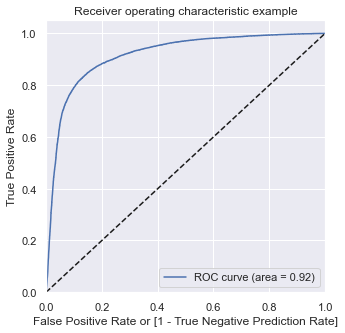

In [93]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.121233,0,1,1,0,0,0,0,0,0,0,0
1,0.0,0.309278,0,1,1,1,1,0,0,0,0,0,0
2,0.0,0.309980,0,1,1,1,1,0,0,0,0,0,0
3,0.0,0.461393,0,1,1,1,1,1,0,0,0,0,0
4,0.0,0.550055,1,1,1,1,1,1,1,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.717208     0.976410     0.458005
0.2          0.2  0.771853     0.955516     0.588190
0.3          0.3  0.807730     0.931927     0.683534
0.4          0.4  0.829868     0.902167     0.757569
0.5          0.5  0.845578     0.871112     0.820044
0.6          0.6  0.849181     0.826887     0.871474
0.7          0.7  0.839719     0.764724     0.914714
0.8          0.8  0.800316     0.650353     0.950280
0.9          0.9  0.626711     0.269546     0.983876


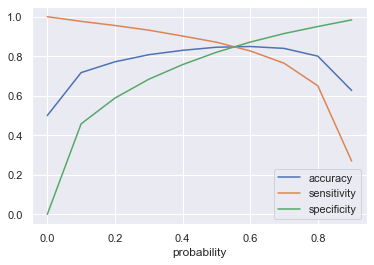

In [96]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- Initially we selected the optimm point of classification as 0.5.
- From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6.

In [97]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0.0,0.121233,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.309278,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.309980,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.461393,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.550055,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.845578     0.871112     0.820044
0.51         0.51  0.846174     0.867171     0.825176
0.52         0.52  0.846900     0.862661     0.831139
0.53         0.53  0.847937     0.859083     0.836790
0.54         0.54  0.848662     0.854573     0.842752
0.55         0.55  0.849051     0.850581     0.847522
0.56         0.56  0.849673     0.846537     0.852810
0.57         0.57  0.849155     0.841248     0.857061
0.58         0.58  0.849570     0.837101     0.862039
0.59         0.59  0.849233     0.832383     0.866083


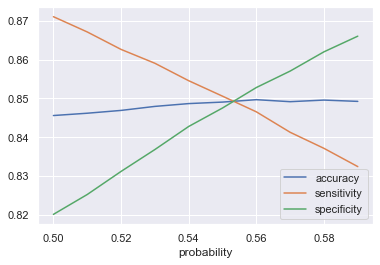

In [99]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.55

In [100]:
# From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0.0,0.121233,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.309278,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.309980,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.461393,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.550055,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1


In [101]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8490512235586893


In [102]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16347  2941]
 [ 2882 16406]]


In [104]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.850580671920365
Specificity =  0.8475217751970137
False Positive Rate =  0.1524782248029863
Precision =  0.8479867679743629
True Negative Prediction Rate =  0.8501222112434343


### Logistic regression with out PCA accuracy score 84.5%

## Logistic Regression using PCA

In [107]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [118]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [119]:
print(pca.components_)
colnames = list(X_train.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
# pcs_df.head(10)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 8.06104500e-03  5.26463778e-03  1.48473859e-02 ... -1.76141640e-03
  -4.27012185e-03 -3.61511130e-03]
 [ 6.58934227e-02  4.90444457e-02  5.93023704e-02 ... -8.05528572e-03
  -2.08221123e-02 -1.71297323e-02]
 [ 7.08476716e-02  5.72371686e-02  8.43386798e-02 ...  8.87273307e-03
   1.81253588e-02  1.66485240e-02]
 ...
 [ 0.00000000e+00 -1.15998178e-16 -3.08959526e-17 ... -2.25049981e-01
  -1.82105249e-01  2.37754528e-02]
 [-0.00000000e+00 -6.09031494e-17  7.16191361e-17 ...  5.09252341e-02
  -2.99511017e-01 -4.98470036e-01]
 [ 0.00000000e+00 -1.99739339e-16 -5.30192883e-17 ... -4.02424654e-01
  -4.79321775e-01  6.26871983e-01]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.008061,0.065893,0.070848,-0.018534,0.065157,-0.001870,0.033101,-0.014495,-0.101602,-0.037350,arpu_6
1,0.005265,0.049044,0.057237,-0.013177,0.062125,0.014858,0.030669,-0.020431,0.059580,0.021672,arpu_7
2,0.014847,0.059302,0.084339,-0.008928,0.090540,0.028595,0.038171,-0.045374,0.114597,0.099754,arpu_8
3,-0.032377,0.180544,0.035840,-0.130504,0.064353,0.072982,-0.328206,-0.109877,-0.188520,-0.151909,onnet_mou_6
4,-0.031641,0.174068,0.039977,-0.121446,0.074373,0.091856,-0.306370,-0.138940,0.038284,0.038894,onnet_mou_7
5,-0.016357,0.114781,0.033294,-0.075426,0.055932,0.069619,-0.193717,-0.103148,0.079238,0.077002,onnet_mou_8
6,-0.005523,0.171124,0.103350,-0.020640,0.022218,0.004809,0.340557,0.062222,-0.192457,-0.140377,offnet_mou_6
7,-0.007467,0.154685,0.098154,-0.017506,0.030662,0.025662,0.317771,0.043199,0.052240,0.048970,offnet_mou_7
8,0.001002,0.091026,0.068507,-0.004865,0.026575,0.024904,0.179232,0.000757,0.088716,0.083647,offnet_mou_8
9,0.003446,0.005772,0.001126,-0.002624,0.007529,-0.013973,0.005412,0.001362,0.045201,0.038512,roam_ic_mou_6


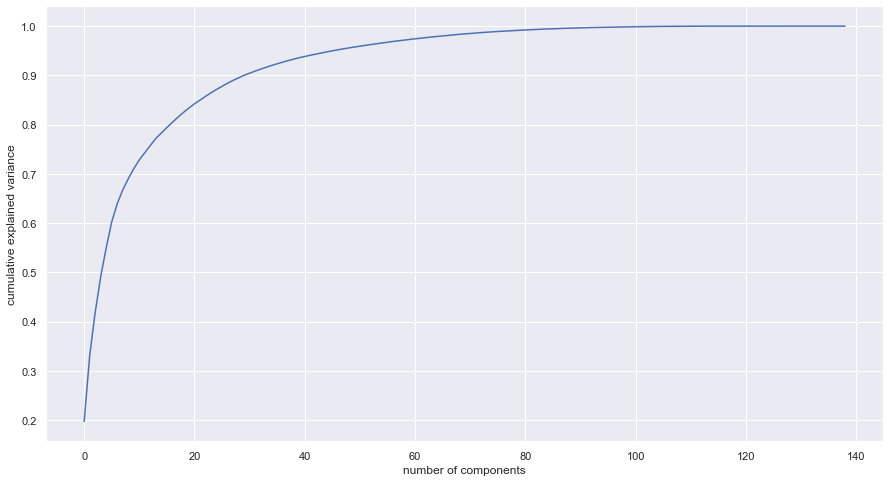

In [120]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- As we can see 60 component explain almost 98% of variance in the data

In [121]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 60)

In [122]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.034025861995556066 , min corr:  -0.02046444708247471


In [123]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 60)

In [124]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [125]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.8'

In [126]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [128]:
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6193 2079]
 [ 119  610]]
0.7558049105654927


In [129]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [131]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.7962618037480134


In [132]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

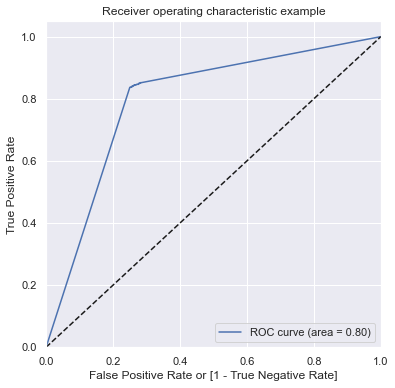

(array([0.        , 0.24987911, 0.25      , 0.25012089, 0.25024178,
        0.25036267, 0.25048356, 0.25060445, 0.25072534, 0.25084623,
        0.25096712, 0.25108801, 0.2512089 , 0.25132979, 0.25145068,
        0.25157157, 0.25169246, 0.25181335, 0.25193424, 0.25205513,
        0.25217602, 0.25229691, 0.25241779, 0.25253868, 0.25265957,
        0.25278046, 0.25290135, 0.25302224, 0.25314313, 0.25326402,
        0.25338491, 0.2535058 , 0.25362669, 0.25374758, 0.25386847,
        0.25386847, 0.25398936, 0.25411025, 0.25423114, 0.25435203,
        0.25447292, 0.25459381, 0.2547147 , 0.25483559, 0.25495648,
        0.25507737, 0.25519826, 0.25531915, 0.25544004, 0.25556093,
        0.25568182, 0.25580271, 0.2559236 , 0.25604449, 0.25616538,
        0.25628627, 0.25640716, 0.25652805, 0.25664894, 0.25676983,
        0.25676983, 0.25676983, 0.25689072, 0.25701161, 0.2571325 ,
        0.25725338, 0.25737427, 0.25749516, 0.25761605, 0.25773694,
        0.25785783, 0.25797872, 0.25809961, 0.25

In [133]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [137]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.churn.value_counts()

0.0    8272
1.0     729
Name: churn, dtype: int64

In [138]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6193, 2079],
       [ 119,  610]], dtype=int64)

In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7558049105654927
Sensitivity:  0.8367626886145405
Specificity:  0.7486702127659575
false postive rate:  0.25132978723404253
positive predictive value:  0.22685013015991073
Negative predictive value:  0.9811470215462611
Misclassification Rate:  0.24419508943450727


### Logistic regression with out PCA accuracy score 75.6% on test data

## DecisionTreeClassifier With PCA

In [140]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [141]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.94      0.59      0.73      8272
         1.0       0.11      0.58      0.19       729

    accuracy                           0.59      9001
   macro avg       0.53      0.59      0.46      9001
weighted avg       0.87      0.59      0.68      9001

[[4916 3356]
 [ 307  422]]
Acuracy Score 0.5930452171980891


In [142]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.5930452171980891
Sensitivity:  0.578875171467764
Specificity:  0.594294003868472
false postive rate:  0.405705996131528
positive predictive value:  0.11169931180518793
Negative predictive value:  0.9412215201991193
Misclassification Rate:  0.4069547828019109


- These are very low let's optimise the model

### Hyperparameter tuning

In [143]:
# lets tune hyper parameterss
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [144]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136091,0.007889,0.003301,0.003637,1,{'max_depth': 1},0.749524,0.733810,0.737857,0.720714,0.715238,0.731429,0.012259,38
1,0.249926,0.012148,0.001590,0.000786,2,{'max_depth': 2},0.596190,0.598810,0.619286,0.598810,0.595952,0.601810,0.008824,39
2,0.357274,0.008937,0.001794,0.000398,3,{'max_depth': 3},0.752143,0.753571,0.771190,0.749048,0.720000,0.749190,0.016517,36
3,0.457576,0.007760,0.001397,0.000488,4,{'max_depth': 4},0.755952,0.732143,0.746667,0.747381,0.749524,0.746333,0.007814,37
4,0.561106,0.012760,0.001590,0.000484,5,{'max_depth': 5},0.804048,0.808571,0.806190,0.749048,0.775714,0.788714,0.023140,32


In [147]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [149]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [150]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.191013,0.055272,0.002394,0.000488,5,{'min_samples_split': 5},0.879286,0.880000,0.884524,0.881667,0.872857,0.879667,0.003853,1
1,1.116151,0.053486,0.001998,0.000635,25,{'min_samples_split': 25},0.835238,0.841190,0.839762,0.840952,0.835714,0.838571,0.002578,2
2,1.144114,0.088721,0.001793,0.000398,45,{'min_samples_split': 45},0.810000,0.815952,0.800714,0.805000,0.808571,0.808048,0.005092,3
3,1.077507,0.027726,0.001605,0.000797,65,{'min_samples_split': 65},0.795000,0.794048,0.778333,0.787381,0.788810,0.788714,0.005958,4
4,1.103911,0.089750,0.001995,0.000632,85,{'min_samples_split': 85},0.775476,0.780000,0.762381,0.777381,0.781190,0.775286,0.006754,5


In [151]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [152]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.637421,0.034700,0.004188,0.001323,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.714048,0.79,0.788095,0.765238,0.789048,0.769286,0.029124,101
1,1.644202,0.036062,0.005186,0.002631,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.714048,0.79,0.788095,0.765238,0.789048,0.769286,0.029124,101
2,1.712417,0.043732,0.003790,0.000978,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.714048,0.79,0.788095,0.764524,0.789048,0.769143,0.029145,104
3,1.726980,0.044791,0.002593,0.000488,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.714048,0.79,0.788095,0.764524,0.789048,0.769143,0.029145,104
4,1.675120,0.043630,0.003391,0.000488,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.714048,0.79,0.788095,0.764524,0.789048,0.769143,0.029145,104


In [153]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8042857142857143
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [154]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [155]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[7421,  851],
       [ 673,   56]], dtype=int64)

In [156]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.07681755829903979
Specificity:  0.8971228239845261
false postive rate:  0.10287717601547389
positive predictive value:  0.06174200661521499
Negative predictive value:  0.9168519891277489
Misclassification Rate:  0.16931452060882124


### DecisionTreeClassifier With PCA accuracy score 80.4%

## RandomForestClassifier with PCA

In [157]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [158]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8272,    0],
       [ 729,    0]], dtype=int64)

In [159]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.0
Specificity:  1.0
false postive rate:  0.0
positive predictive value:  nan
Negative predictive value:  0.9190089990001111
Misclassification Rate:  0.0809910009998889


In [160]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             scoring='accuracy')

In [161]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.105419,0.078137,0.096742,0.018486,2,{'max_depth': 2},0.806905,0.789524,0.802143,0.812619,0.802143,0.802667,0.007620,4
1,10.497125,0.180518,0.080186,0.007893,7,{'max_depth': 7},0.870952,0.879762,0.880476,0.880714,0.882381,0.878857,0.004045,3
2,13.228421,0.503109,0.087368,0.001850,12,{'max_depth': 12},0.918095,0.920238,0.917619,0.920476,0.911190,0.917524,0.003362,2
3,11.765381,0.920300,0.068419,0.002848,17,{'max_depth': 17},0.923810,0.924524,0.925000,0.920714,0.916190,0.922048,0.003287,1


In [163]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             scoring='accuracy')

In [164]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.058273,0.193504,0.086769,0.004592,100,{'n_estimators': 100},0.908333,0.915000,0.910714,0.909762,0.906190,0.910000,0.002928,4
1,61.024976,0.750407,0.466752,0.035210,500,{'n_estimators': 500},0.910476,0.914286,0.910000,0.911190,0.907381,0.910667,0.002220,2
2,111.030265,1.415551,0.783504,0.080002,900,{'n_estimators': 900},0.908810,0.915000,0.912381,0.910238,0.906905,0.910667,0.002811,2
3,141.123237,9.503181,0.889821,0.135763,1300,{'n_estimators': 1300},0.910000,0.915000,0.913333,0.910714,0.906905,0.911190,0.002797,1


In [165]:

# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             scoring='accuracy')

In [166]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.232257,0.030841,0.095345,0.002572,4,{'max_features': 4},0.908333,0.913571,0.912143,0.909762,0.907381,0.910238,0.002313,1
1,13.439886,0.116586,0.083976,0.001934,8,{'max_features': 8},0.904762,0.912381,0.907857,0.909524,0.905952,0.908095,0.002690,3
2,22.528237,0.262733,0.093150,0.015224,14,{'max_features': 14},0.907381,0.909286,0.913333,0.912143,0.905476,0.909524,0.002912,2
3,31.627742,0.471719,0.077394,0.004165,20,{'max_features': 20},0.906429,0.908571,0.910714,0.910952,0.902619,0.907857,0.003090,4
4,32.246884,3.029197,0.059643,0.006412,24,{'max_features': 24},0.905476,0.908095,0.909762,0.907381,0.903333,0.906810,0.002216,5


In [167]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             scoring='accuracy')

In [168]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.783235,0.097719,0.078191,0.002570,100,{'min_samples_leaf': 100},0.854762,0.855476,0.865000,0.861667,0.865238,0.860429,0.004521,1
1,8.979385,0.070429,0.077193,0.002930,150,{'min_samples_leaf': 150},0.840476,0.848095,0.851667,0.850238,0.860000,0.850095,0.006279,2
2,8.402327,0.082768,0.074201,0.002571,200,{'min_samples_leaf': 200},0.836905,0.840476,0.849762,0.843095,0.846667,0.843381,0.004516,3
3,7.921417,0.054130,0.086967,0.019166,250,{'min_samples_leaf': 250},0.828333,0.832143,0.842381,0.837381,0.842143,0.836476,0.005530,4
4,7.321021,0.501179,0.076795,0.009440,300,{'min_samples_leaf': 300},0.822143,0.824048,0.835952,0.837381,0.842619,0.832429,0.007960,5


In [169]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             scoring='accuracy')

In [170]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.545425,0.077346,0.049472,0.000792,200,{'min_samples_split': 200},0.872381,0.879048,0.880000,0.876905,0.880714,0.877810,0.003002,1
1,7.573346,0.628497,0.058252,0.008037,250,{'min_samples_split': 250},0.866190,0.872381,0.873333,0.872381,0.873571,0.871571,0.002734,2
2,6.779728,0.110910,0.052663,0.002462,300,{'min_samples_split': 300},0.859524,0.861905,0.867143,0.863571,0.868571,0.864143,0.003325,3
3,6.897940,0.378191,0.054255,0.007893,350,{'min_samples_split': 350},0.852857,0.860476,0.864286,0.856667,0.860952,0.859048,0.003927,4
4,6.602349,0.477914,0.049453,0.006041,400,{'min_samples_split': 400},0.852857,0.857143,0.860476,0.858095,0.865714,0.858857,0.004223,5


In [171]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [172]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [173]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8616190476190477 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [174]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

In [175]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=300)

In [176]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [177]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      8272
         1.0       0.28      0.28      0.28       729

    accuracy                           0.88      9001
   macro avg       0.61      0.61      0.61      9001
weighted avg       0.88      0.88      0.88      9001

[[7746  526]
 [ 527  202]]
accuracy_score:   0.883012998555716


In [178]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7746,  526],
       [ 527,  202]], dtype=int64)

In [179]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Accuracy Score:   0.883012998555716
Sensitivity:  0.27709190672153633
Specificity:  0.936411992263056
false postive rate:  0.06358800773694391
positive predictive value:  0.2774725274725275
Negative predictive value:  0.9362988033361538
Misclassification Rate:  0.11698700144428396


#### RandomForest with PCA has an Accuracy Score of  88.3%

### Conclusion
- Among all the classification modela Random Forrest classifier has performed better with an accuracy score of 88.3%